In [132]:
import jax
import jax.numpy as jnp
from tqdm import tqdm
import netket as nk
# import netket_pro as nkp
import matplotlib.pyplot as plt
import os

In [133]:
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

In [134]:
from grad_sample.utils.plotting_setup import *

In [135]:
alpha = 4
path1 = f"/scratch/.amisery/grad_sample/ising_1.0/L3/RBM/alpha{alpha}/saved_3_10/out_analysis_oneshot_curved_dist.npz"

out_dict1 = jnp.load(path1, allow_pickle=True)["arr_0"].item()

In [136]:
steps = out_dict1.keys()

In [137]:
print(steps)

dict_keys([1, 222, 444, 666, 888, 1110, 1332, 1554, 1776, 1999, 'commons'])


In [138]:
nparams = alpha*(9)*(9) + 9*alpha + 9
print(nparams)

369


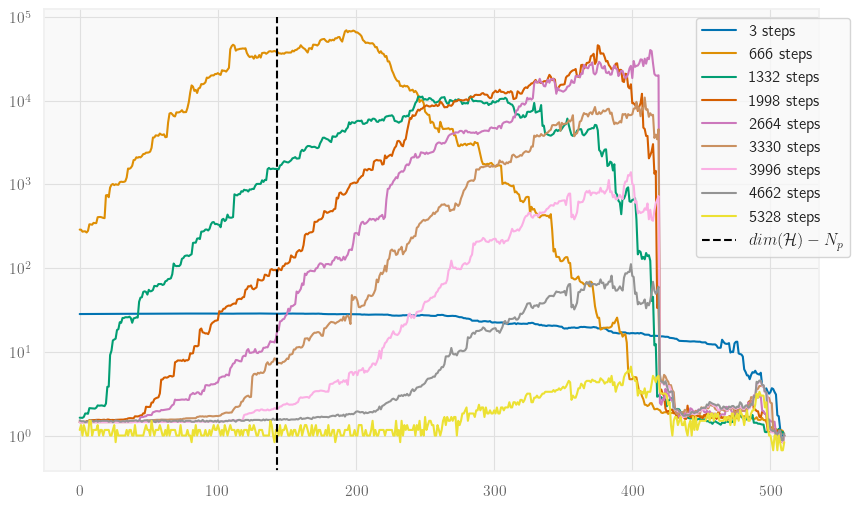

In [144]:
for j in list(out_dict1.keys())[:-2]:
    if type(j) == int:
        plt.plot(out_dict1[j]["infid_ev"], label = "%d steps"%(j*3))
        plt.yscale("log")
plt.vlines(len(out_dict1[list(out_dict1.keys())[0]]["infid_ev"]) - nparams,10e-4, 10e4, linestyles= "--", color="black", label="$dim(\mathcal{H}) - N_p$")
plt.legend(bbox_to_anchor = (1.05, 1))

1
6


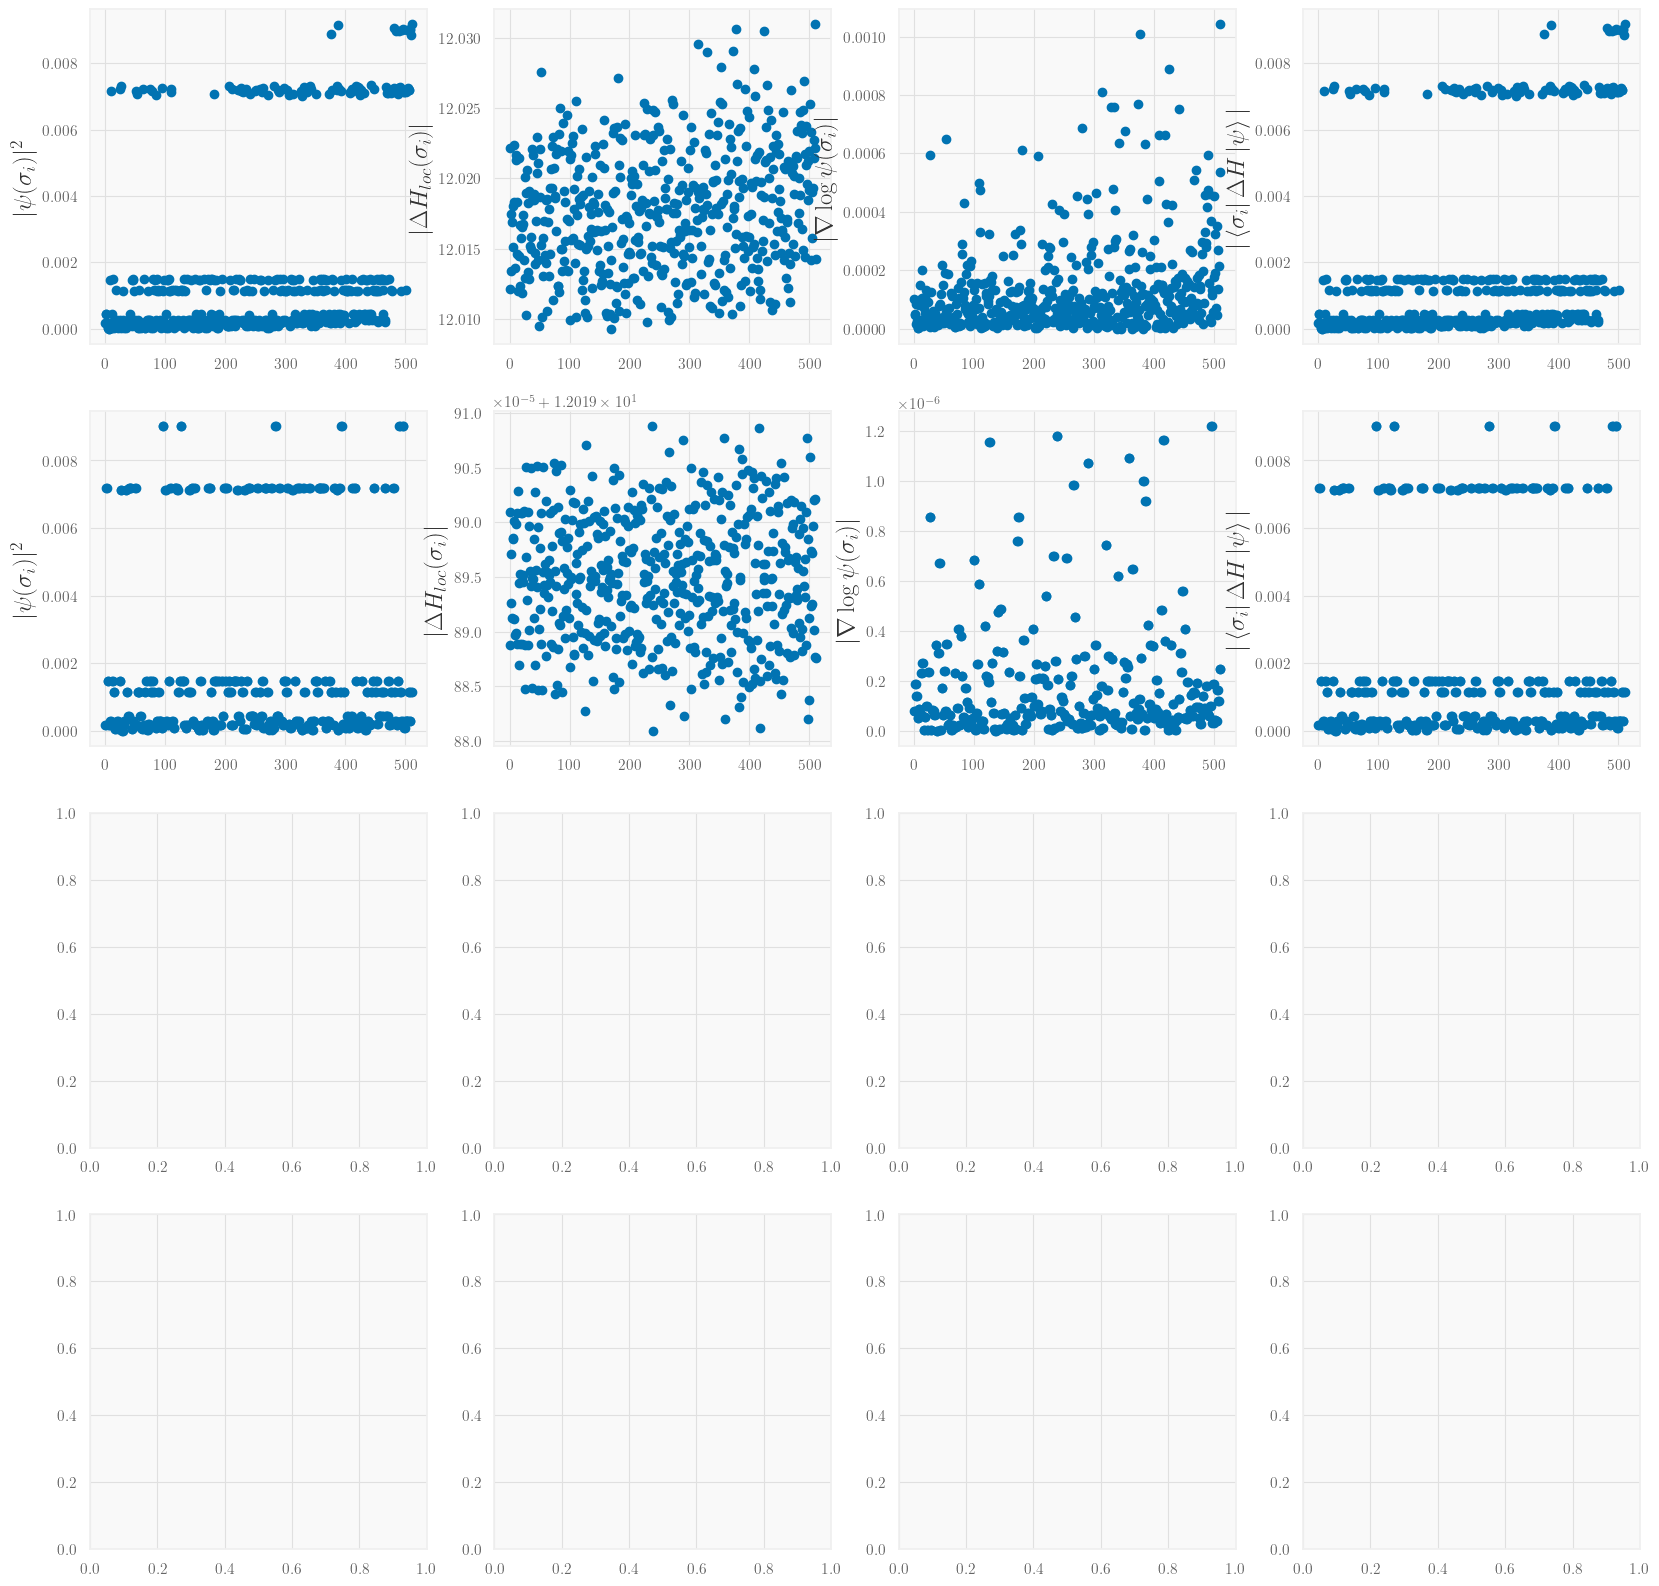

In [140]:
fig, axes = plt.subplots(4,4, figsize = (20,20))
i = 0

for j in range(1,len(steps), 5):
    step = list(steps)[j]
    print(j)
    vals = out_dict1[step]["in_idx"]
    pdf = out_dict1[step]["pdf"]
    hloc = jnp.abs(out_dict1[step]["Hloc"])
    hloc_c = jnp.sqrt(pdf)*(hloc - jnp.sum(hloc*pdf))
    # print(out_dict1[]["pdf"][vals])
    axes[i, 0].scatter(jnp.arange(512), out_dict1[step]["pdf"][vals])
    axes[i, 0].set_ylabel(r"$|\psi(\sigma_i)|^2$", fontsize = 18)
    # axes[0].set_yscale("log")
    axes[i, 1].scatter(jnp.arange(512),jnp.abs(out_dict1[step]["Hloc"])[vals])
    axes[i, 1].set_ylabel(r"$|\Delta H_{loc}(\sigma_i)|$", fontsize=18)
    # axes[1].set_yscale("log")
    axes[i, 2].scatter(jnp.arange(512), jnp.abs(hloc_c)[vals])
    # axes[2].set_yscale("log")
    axes[i, 2].set_ylabel(r"$|\nabla\log \psi(\sigma_i)|$", fontsize = 18)
    axes[i, 3].scatter(jnp.arange(512), jnp.abs(out_dict1[step]["pdf"])[vals])
    axes[i, 3].set_ylabel(r"$|\bra{\sigma_i}\Delta H \ket{\psi}|$", fontsize=18)
    i+=1

# fig.suptitle("Several quantities over sample removal, after %d its, relative error %.2e, centered quantities in full summation"%(save_every*state_idx, E_err[save_every*state_idx]), fontsize=20)
plt.show()

In [141]:
for j in range(0,len(steps),5):
    print(j)

0
5
10
